In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# starting probabilities

p_disease : np.float64 = 0.01
p_no_disease : np.float64 = 0.99

#test characteristics
p_positive_given_disease : np.float64 = 0.95
p_negative_given_no_disease : np.float64 = 0.90

In [21]:
# P(disease | positive) = P(positive | disease) * P(disease) / P(positive)
# P(positive) = P(positive | disease) * P(disease) + P(positive | no disease) * P(no disease)
p_positive : np.float64 = p_positive_given_disease * p_disease + (1 - p_negative_given_no_disease) * p_no_disease
p_disease_given_positive : np.float64 = p_positive_given_disease * p_disease / p_positive
print(f"P(positive) = {p_positive:.4f}")
print(f"P(disease | positive) = {p_disease_given_positive:.4f}")

P(positive) = 0.1085
P(disease | positive) = 0.0876


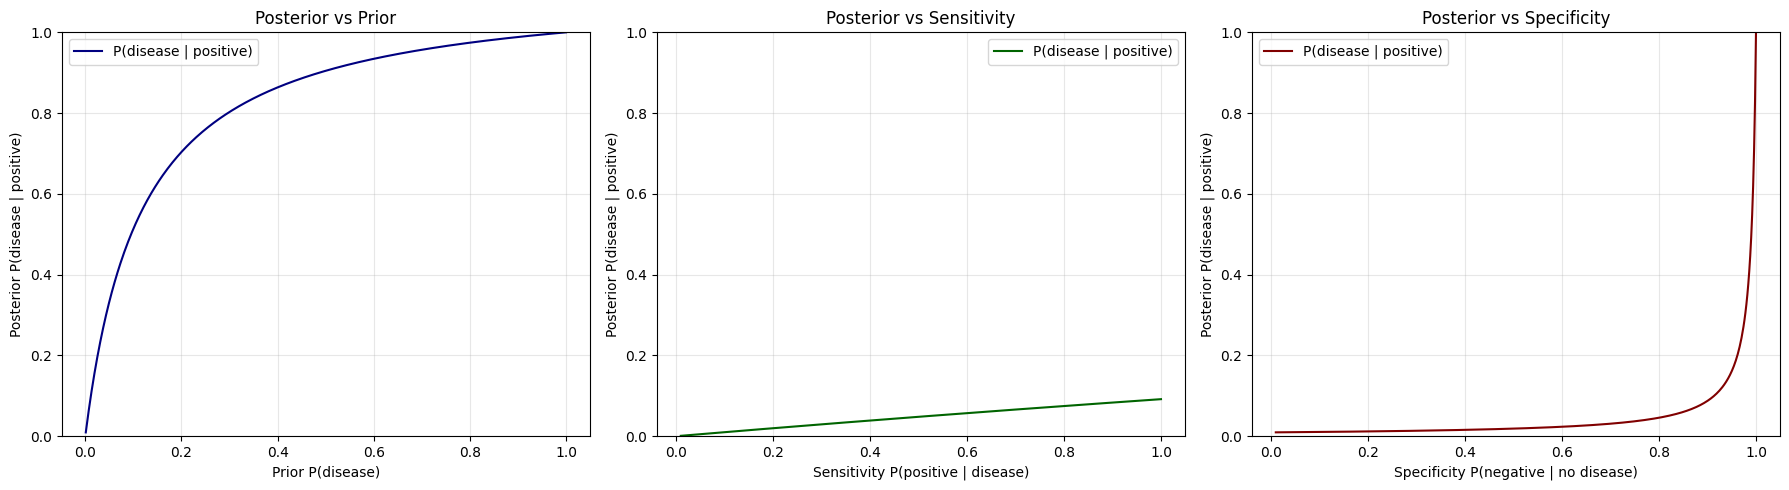

In [22]:
# 1) Posterior probability as a function of prior probability P(disease)
prior_values = np.linspace(0.001, 1.0, 500)

p_positive_prior = (
    p_positive_given_disease * prior_values
    + (1 - p_negative_given_no_disease) * (1 - prior_values)
)
posterior_vs_prior = (p_positive_given_disease * prior_values) / p_positive_prior

# 2) Posterior probability as a function of sensitivity P(positive | disease)
sensitivity_values = np.linspace(0.01, 1.0, 500)

p_positive_sens = (
    sensitivity_values * p_disease
    + (1 - p_negative_given_no_disease) * p_no_disease
)
posterior_vs_sensitivity = (sensitivity_values * p_disease) / p_positive_sens

# 3) Posterior probability as a function of specificity P(negative | no disease)
specificity_values = np.linspace(0.01, 1.0, 500)

p_positive_spec = (
    p_positive_given_disease * p_disease
    + (1 - specificity_values) * p_no_disease
)
posterior_vs_specificity = (p_positive_given_disease * p_disease) / p_positive_spec

# Plot all three relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(prior_values, posterior_vs_prior, color='navy', label='P(disease | positive)')
axes[0].set_title('Posterior vs Prior')
axes[0].set_xlabel('Prior P(disease)')
axes[0].set_ylabel('Posterior P(disease | positive)')
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(sensitivity_values, posterior_vs_sensitivity, color='darkgreen', label='P(disease | positive)')
axes[1].set_title('Posterior vs Sensitivity')
axes[1].set_xlabel('Sensitivity P(positive | disease)')
axes[1].set_ylabel('Posterior P(disease | positive)')
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

axes[2].plot(specificity_values, posterior_vs_specificity, color='maroon', label='P(disease | positive)')
axes[2].set_title('Posterior vs Specificity')
axes[2].set_xlabel('Specificity P(negative | no disease)')
axes[2].set_ylabel('Posterior P(disease | positive)')
axes[2].set_ylim(0, 1)
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

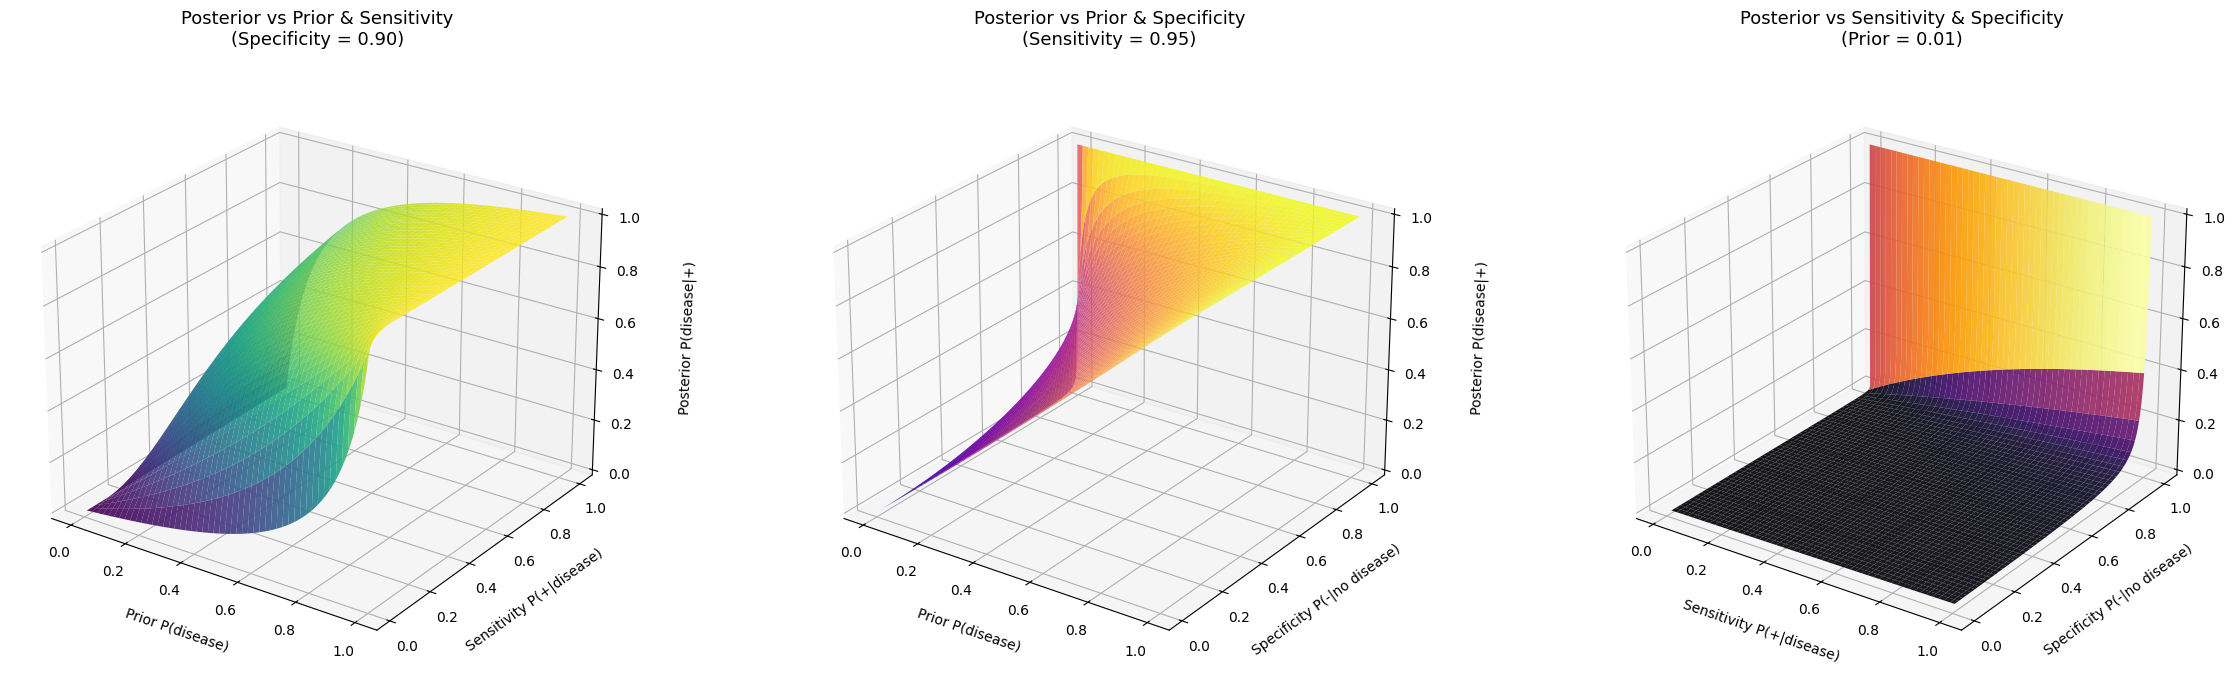

In [ ]:
def posterior(prior, sensitivity, specificity):
    p_pos = sensitivity * prior + (1 - specificity) * (1 - prior)
    return sensitivity * prior / p_pos

N = 200
priors = np.linspace(0.001, 1.0, N)
sens = np.linspace(0.01, 1.0, N)
specs = np.linspace(0.01, 1.0, N)

plots = [
    {
        'x': np.meshgrid(priors, sens),
        'fixed': lambda P, S: posterior(P, S, p_negative_given_no_disease),
        'labels': ('Prior P(disease)', 'Sensitivity P(+|disease)'),
        'title': 'Posterior vs Prior & Sensitivity\n(Specificity = 0.90)',
        'cmap': 'viridis',
    },
    {
        'x': np.meshgrid(priors, specs),
        'fixed': lambda P, Sp: posterior(P, p_positive_given_disease, Sp),
        'labels': ('Prior P(disease)', 'Specificity P(-|no disease)'),
        'title': 'Posterior vs Prior & Specificity\n(Sensitivity = 0.95)',
        'cmap': 'plasma',
    },
    {
        'x': np.meshgrid(sens, specs),
        'fixed': lambda Se, Sp: posterior(p_disease, Se, Sp),
        'labels': ('Sensitivity P(+|disease)', 'Specificity P(-|no disease)'),
        'title': 'Posterior vs Sensitivity & Specificity\n(Prior = 0.01)',
        'cmap': 'inferno',
    },
]

fig = plt.figure(figsize=(24, 7))

for i, p in enumerate(plots):
    X, Y = p['x']
    Z = p['fixed'](X, Y)
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=p['cmap'], edgecolor='none', alpha=0.9)
    ax.set_xlabel(p['labels'][0], labelpad=10)
    ax.set_ylabel(p['labels'][1], labelpad=10)
    ax.set_zlabel('Posterior P(disease|+)', labelpad=18)
    ax.set_title(p['title'], fontsize=13, pad=15)
    ax.view_init(elev=25, azim=-55)

plt.tight_layout()
plt.show()